In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

In [10]:
! pip install xgboost

In [12]:
data=pd.read_csv('C:\\Users\\divya\\Downloads\\wind_optimization_final\\wind_optimization\\Turbine_Data.csv\\Turbine_Data.csv')

In [13]:
data.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [42]:
data.shape

(118224, 22)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [44]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [45]:

for i,j in data.isnull().sum():
    


Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [14]:
final_data=data[["ActivePower","WindSpeed"]] ## active power in Kwatt,wind speed in kmph

In [15]:
final_data=final_data.dropna()

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94436 entries, 144 to 118223
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ActivePower  94436 non-null  float64
 1   WindSpeed    94436 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [17]:
final_data.duplicated().sum()

141

In [18]:
final_data.drop_duplicates(inplace=True)

In [19]:
final_data.duplicated().sum()

0

C:\Users\divya\AppData\Local\Temp\ipykernel_14184\551707635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

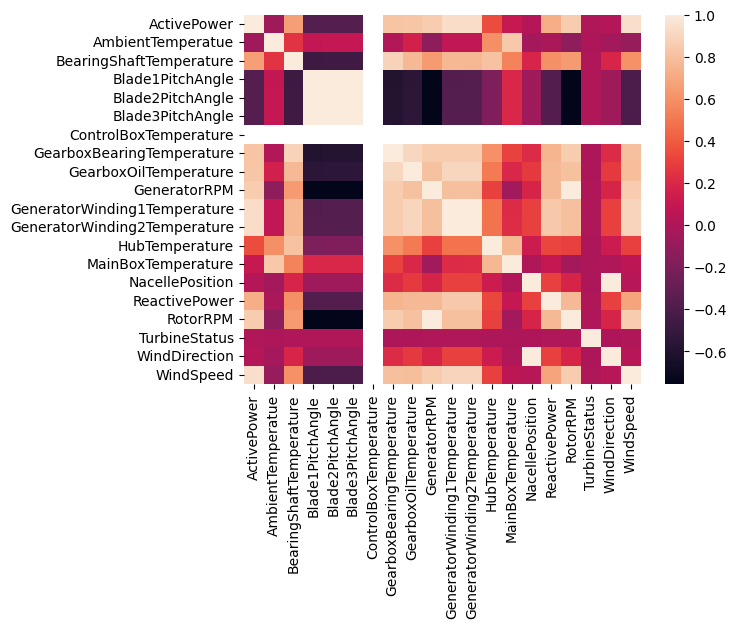

In [48]:

sns.heatmap(data.corr())

In [20]:
final_data.shape

(94295, 2)

In [21]:
final_data=final_data[final_data["ActivePower"]>0]
final_data.shape

(78149, 2)

In [34]:
xtest

NameError: name 'xtest' is not defined

In [23]:
x_train,x_test=final_data["WindSpeed"][0:62519],final_data["WindSpeed"][62519:]
y_train,y_test=final_data["ActivePower"][0:62519],final_data["ActivePower"][62519:]

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((62519,), (62519,), (15630,), (15630,))

In [35]:
x_test

98768     5.655568
98769     5.568566
98770     5.688647
98771     5.365842
98772     5.134980
            ...   
118219    3.533445
118220    3.261231
118221    3.331839
118222    3.284468
118223    3.475205
Name: WindSpeed, Length: 15630, dtype: float64

In [25]:
model = xgb.XGBRegressor(n_estimators=1000)

In [26]:
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
          early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
          verbose=False) 

c:\Users\divya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
pred = model.predict(x_test)

In [28]:
comp_data= pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred })  
comp_data

,Actuals,Predictions
98768,358.884706,432.230133
98769,367.785866,414.517059
98770,353.324646,438.334503
98771,266.009012,365.749023
98772,233.277772,316.175659
...,...,...
118219,70.044465,60.024158
118220,40.833474,31.883696
118221,20.777790,39.722691
118222,62.091039,37.833496


In [29]:
#Evaluation of Xgboost
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(comp_data['Actuals'],comp_data['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(comp_data['Actuals'],comp_data['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(comp_data['Actuals'],comp_data['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(comp_data['Actuals'],comp_data['Predictions'])))   

The Coefficient of determination (R-squared) = 0.976
The mean absolute error (MAE)                = 51.30
The RMSE error (RMSE)                        = 71.02
The Mean absolute percentage error (MAPE)    = 217.682


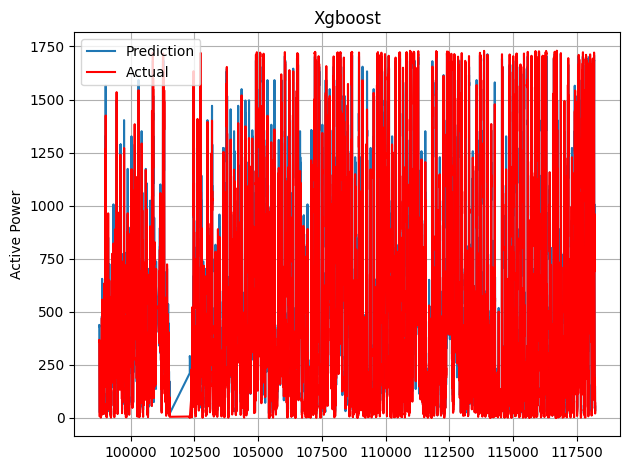

In [49]:
# plot
plt.plot(comp_data['Predictions'],label='Prediction')
plt.plot(comp_data['Actuals'], color='red',label='Actual')
plt.title("Xgboost")

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [69]:

#Random Forest Regressor
x_train_rfr,x_test_rfr=final_data.loc[0:62519,["WindSpeed"]],final_data.loc[62519:,["WindSpeed"]]
y_train_rfr,y_test_rfr=final_data.loc[0:62519,["ActivePower"]],final_data.loc[62519:,["ActivePower"]]
x_train_rfr.shape
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(x_train_rfr,y_train_rfr)
y_pred_rfr=rfr.predict(x_test_rfr)


C:\Users\divya\AppData\Local\Temp\ipykernel_14184\385026111.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train_rfr,y_train_rfr)


In [70]:
y_pred_rfr

array([ 16.0901093 ,  15.6246754 ,  51.44812725, ..., 115.1001156 ,
        12.17283833,  27.59411252])

In [74]:
y_test_rfr.shape

(41607, 1)

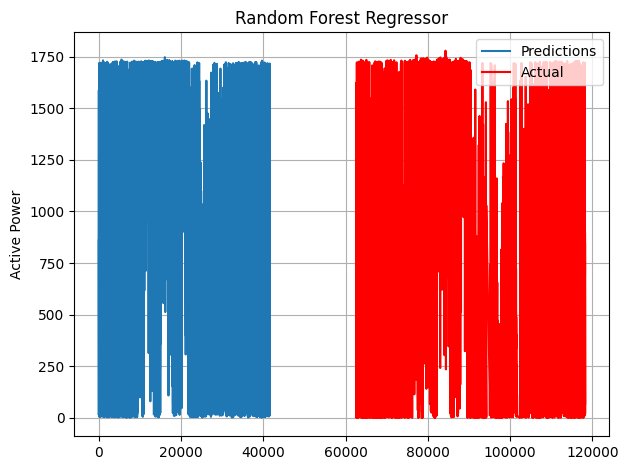

In [87]:
# plot
plt.plot(y_pred_rfr,label='Predictions')
plt.plot(y_test_rfr, color='red',label='Actual')
plt.title("Random Forest Regressor")

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [77]:

#Evaluation of Random Forest Regressor
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(y_pred_rfr,y_test_rfr)))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(y_pred_rfr,y_test_rfr)))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(y_pred_rfr,y_test_rfr,squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(y_pred_rfr,y_test_rfr)))   




The Coefficient of determination (R-squared) = 0.974
The mean absolute error (MAE)                = 61.31
The RMSE error (RMSE)                        = 95.61
The Mean absolute percentage error (MAPE)    = 0.179


In [79]:
#LSTM RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [80]:
x_train.shape

(62519,)

In [81]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dense(1, activation='linear'))  # Adjust activation based on your task

    model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss function based on your task

    return model

# Specify the input shape based on your data
input_shape = (62519, 1)  # Adjust based on your data

# Build the LSTM model
lstm_model = build_lstm_model(input_shape)

# Display the model summary
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Assuming X_train and y_train are your training data and labels
# Adjust batch size, epochs, and validation split as needed
lstm_model.fit(x_train_rfr, y_train_rfr, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
914/914 [==============================] - 8s 5ms/step - loss: 862302.4375 - val_loss: 435187.1562
Epoch 2/10
914/914 [==============================] - 3s 4ms/step - loss: 756502.0000 - val_loss: 373671.0625
Epoch 3/10
914/914 [==============================] - 4s 4ms/step - loss: 676983.8125 - val_loss: 325272.1875
Epoch 4/10
914/914 [==============================] - 4s 5ms/step - loss: 608354.6250 - val_loss: 282043.5000
Epoch 5/10
914/914 [==============================] - 4s 4ms/step - loss: 542559.3125 - val_loss: 240760.5781
Epoch 6/10
914/914 [==============================] - 3s 4ms/step - loss: 482193.8750 - val_loss: 206007.4062
Epoch 7/10
914/914 [==============================] - 3s 3ms/step - loss: 428189.0625 - val_loss: 175957.0469
Epoch 8/10
914/914 [==============================] - 3s 3ms/step - loss: 379177.5938 - val_loss: 149914.8125
Epoch 9/10
914/914 [==============================] - 3s 4ms/step - loss: 334488.5000 - val_loss: 127176.5391
Epoch 10/1

In [84]:
# Assuming X_test is your test data
predictions_lstm = lstm_model.predict(x_test_rfr)

   1/1301 [..............................] - ETA: 1:02

1301/1301 [==============================] - 3s 2ms/step


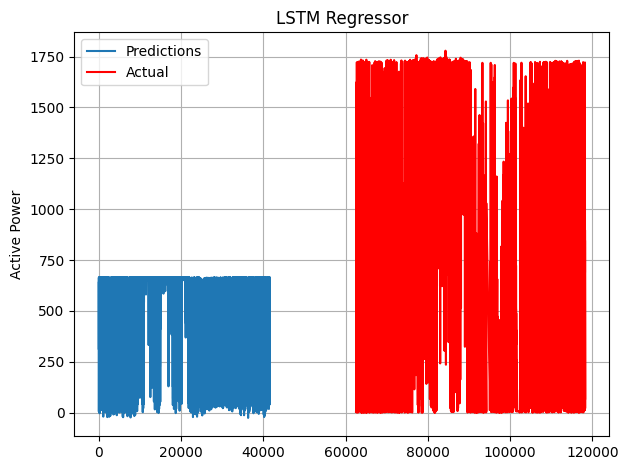

In [89]:
# plot
plt.plot(predictions_lstm,label='Predictions')
plt.plot(y_test_rfr, color='red',label='Actual')
plt.title("LSTM Regressor")

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [37]:
pred=model.predict([5.655568])

In [39]:
pred[0]

432.23013

In [86]:
#Evaluation of LSTM
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(predictions_lstm,y_test_rfr)))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(predictions_lstm,y_test_rfr)))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(predictions_lstm,y_test_rfr,squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(predictions_lstm,y_test_rfr)))   



The Coefficient of determination (R-squared) = -4.302
The mean absolute error (MAE)                = 339.07
The RMSE error (RMSE)                        = 525.82
The Mean absolute percentage error (MAPE)    = 0.605


In [41]:
import pickle

# save model
pickle.dump(model, open('pickel1.pkl', 'wb'))

# load model
model = pickle.load(open('pickel1.pkl', 'rb'))

# predict the output
y_pred = model.predict(x_test)
y_pred
# confusion matrix
#print('Confusion matrix of random Forest: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
#print('Accuracy of random forest= ',accuracy_score(y_test, y_pred))

array([432.23013 , 414.51706 , 438.3345  , ...,  39.72269 ,  37.833496,
        53.889305], dtype=float32)